In [1]:
# import numpy as np
import pandas as pd

import interpreter
import domain
from KMC import KMC2D
import matplotlib.pyplot as plt
import numpy as np

# Definition du substrat
x = 100
y = 50
grid = domain.create_grid(x,y)     # [hauteur, largeur]

liste_kT = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00]
liste_kT = [0.025, 0.10, 0.20, 1.00, 1.40, 2.40]
liste_kT = np.logspace(-1, np.log10(2), num=10)


# x = np.linspace(0.025, 1, 3)**2   # plus dense vers 0
# liste_kT = x * 2.5
# print(liste_kT)

liste_deltamu = np.linspace(-1, 2.6, 10)

nb_pas_temps = 10
gif = False

kT = liste_kT[2]
deltamu = liste_deltamu[0]

nb_iterations=2





In [2]:
moy_gamma_kbt=[]
moy_rugosite_kbt=[]
std_gamma_kbt=[]
std_rugosite_kbt=[]

for dmu in liste_deltamu:
    liste_moy_gamma_kbt=[]
    liste_moy_rugosite_kbt=[]
    liste_std_gamma_kbt=[]
    liste_std_rugosite_kbt=[]
    print(dmu)

    for param_kbT in liste_kT:
        liste_gamma=[]
        liste_rugosite=[]
        for b in range(nb_iterations):
            x = 10
            y = 50
            grid = domain.create_grid(x,y)     # [hauteur, largeur]

            grid_f, deltatemps_reel, parametres = KMC2D(grid, param_kbT, dmu, nb_pas_temps,gamma=True, rugosity=True)

            gamma_iteration=parametres[0][-1]
            liste_gamma.append(gamma_iteration)

            rugosite_iteration=parametres[1][-1]
            liste_rugosite.append(rugosite_iteration)

        gamma_moy_param=np.mean(liste_gamma)
        rugosite_moy_param=np.mean(liste_rugosite)

        gamma_std_param=np.std(liste_gamma)
        rugosite_std_param=np.std(liste_rugosite)

        liste_moy_gamma_kbt.append(gamma_moy_param)
        liste_moy_rugosite_kbt.append(rugosite_moy_param)

        liste_std_gamma_kbt.append(gamma_std_param)
        liste_std_rugosite_kbt.append(rugosite_std_param)
    moy_gamma_kbt.append(liste_moy_gamma_kbt)
    moy_rugosite_kbt.append(liste_moy_rugosite_kbt)
    std_gamma_kbt.append(liste_std_gamma_kbt)
    std_rugosite_kbt.append(liste_std_rugosite_kbt)

# pd.DataFrame(moy_gamma_kbt).to_csv(f"data/moy_gamma_kbt_it_{nb_iterations}_{nb_pas_temps}2.csv", index=False)
# pd.DataFrame(std_gamma_kbt).to_csv(f"data/std_gamma_kbt_it_{nb_iterations}_{nb_pas_temps}2.csv", index=False)
# pd.DataFrame(moy_rugosite_kbt).to_csv(f"data/moy_rugosite_kbt_it_{nb_iterations}_{nb_pas_temps}2.csv", index=False)
# pd.DataFrame(std_rugosite_kbt).to_csv(f"data/std_rugosite_kbt_it_{nb_iterations}_{nb_pas_temps}2.csv", index=False)



-1.0
-0.6
-0.19999999999999996
0.20000000000000018
0.6000000000000001
1.0
1.4000000000000004
1.8000000000000003
2.2
2.6


In [3]:
gamma_moy_mu = []
rugosite_moy_mu = []
gamma_std_mu = []
rugosite_std_mu = []

for kT in liste_kT:
    liste_gamma_moy_mu=[]
    liste_rugosite_moy_mu=[]
    liste_gamma_std_mu=[]
    liste_rugosite_std_mu=[]
    print(kT)
    for param_mu in liste_deltamu:
        liste_gamma=[]
        liste_rugosite=[]
        for b in range(nb_iterations):
            x = 10
            y = 50
            grid = domain.create_grid(x,y)     # [hauteur, largeur]

            grid_f, deltatemps_reel, parametres = KMC2D(grid, kT, param_mu, nb_pas_temps,gamma=True, rugosity=True)

            gamma_iteration=parametres[0][-1]
            liste_gamma.append(gamma_iteration)

            rugosite_iteration=parametres[1][-1]
            liste_rugosite.append(rugosite_iteration)

        gamma_moy_param=np.mean(liste_gamma)
        rugosite_moy_param=np.mean(liste_rugosite)

        gamma_std_param=np.std(liste_gamma)
        rugosite_std_param=np.std(liste_rugosite)

        liste_gamma_moy_mu.append(gamma_moy_param)
        liste_rugosite_moy_mu.append(rugosite_moy_param)

        liste_gamma_std_mu.append(gamma_std_param)
        liste_rugosite_std_mu.append(rugosite_std_param)
    
    gamma_moy_mu.append(liste_gamma_moy_mu)
    rugosite_moy_mu.append(liste_rugosite_moy_mu)
    gamma_std_mu.append(liste_gamma_std_mu)
    rugosite_std_mu.append(liste_rugosite_std_mu)
# pd.DataFrame(moy_gamma_kbt).to_csv(f"data/moy_gamma_mu_it_{nb_iterations}_{nb_pas_temps}2.csv", index=False)
# pd.DataFrame(std_gamma_kbt).to_csv(f"data/std_gamma_mu_it_{nb_iterations}_{nb_pas_temps}2.csv", index=False)
# pd.DataFrame(moy_rugosite_kbt).to_csv(f"data/moy_rugosite_mu_it_{nb_iterations}_{nb_pas_temps}2.csv", index=False)
# pd.DataFrame(std_rugosite_kbt).to_csv(f"data/std_rugosite_mu_it_{nb_iterations}_{nb_pas_temps}2.csv", index=False)


0.09999999999999999
0.13949507939624212
0.1945887717576389
0.27144176165949063
0.3786479009414648
0.5281951900505004
0.7368062997280774
1.0278085328021955
1.4337423288737734
2.0


/tmp/ipykernel_355694/1934685943.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


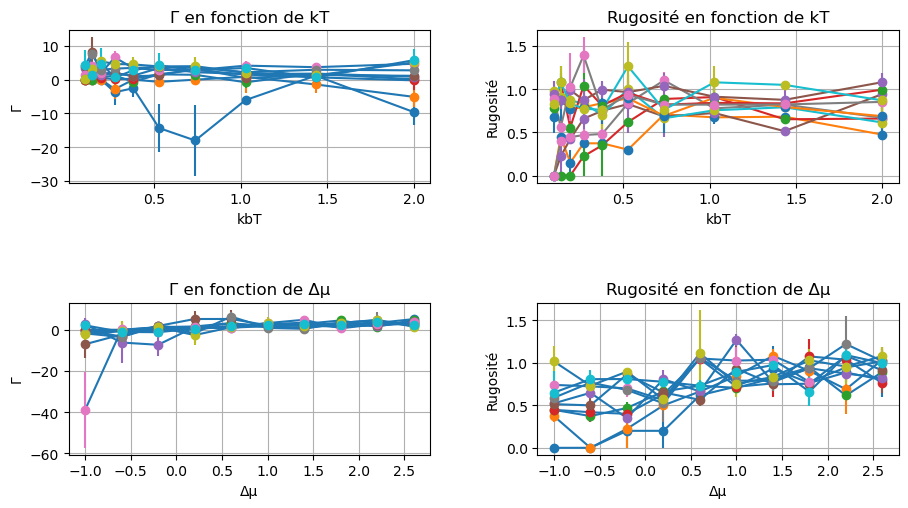

In [4]:
fig,ax=plt.subplots(2,2,figsize=(10,6))


# print(gamma_moy_mu)

for i in range(len(liste_deltamu)):
    ax[0][0].errorbar(liste_kT, moy_gamma_kbt[i], std_gamma_kbt[i],fmt='o')
    ax[0][0].plot(liste_kT, moy_gamma_kbt[i],color='#1f77b4')
ax[0][0].grid()
ax[0][0].set_xlabel('kbT')
ax[0][0].set_ylabel('Γ')
ax[0][0].set_title("Γ en fonction de kT")

for i in range(len(liste_deltamu)):
    ax[0][1].errorbar(liste_kT, moy_rugosite_kbt[i], std_rugosite_kbt[i],fmt='o',label=f"Δμ={liste_deltamu[i]}")
    ax[0][1].plot(liste_kT, moy_rugosite_kbt[i])
ax[0][1].grid()
ax[0][1].set_xlabel('kbT')
ax[0][1].set_ylabel('Rugosité')
ax[0][1].set_title("Rugosité en fonction de kT")

for i in range(len(liste_kT)):
    ax[1][0].errorbar(liste_deltamu, gamma_moy_mu[i],gamma_std_mu[i],fmt='o')
    ax[1][0].plot(liste_deltamu, gamma_moy_mu[i],color='#1f77b4')
ax[1][0].grid()
ax[1][0].set_xlabel('Δμ')
ax[1][0].set_ylabel('Γ')
ax[1][0].set_title("Γ en fonction de Δμ")

for i in range(len(liste_kT)):
    ax[1][1].errorbar(liste_deltamu, rugosite_moy_mu[i], rugosite_std_mu[i],fmt='o')
    ax[1][1].plot(liste_deltamu, rugosite_moy_mu[i],color='#1f77b4')
ax[1][1].grid()
ax[1][1].set_xlabel('Δμ')
ax[1][1].set_ylabel('Rugosité')
ax[1][1].set_title("Rugosité en fonction de Δμ")
fig.tight_layout(pad=4.0) 
fig.show()

ValueError: 'x' and 'y' must have the same size

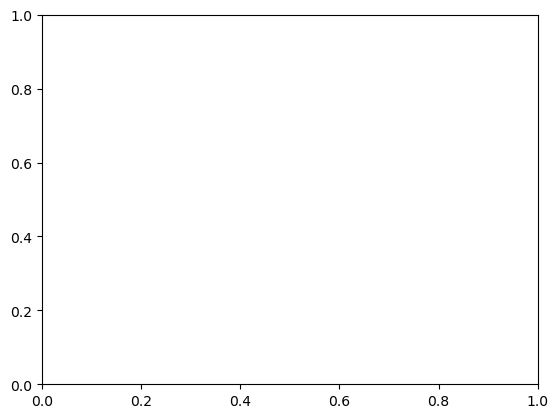

In [9]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.sqrt(x + b)
# popt, pcov = curve_fit(func, liste_kT, moy_gamma_kbt[0], sigma=std_gamma_kbt[0], absolute_sigma=True)


plt.figure()
for index, kT in enumerate(liste_kT):
    if index ==3:
        continue
    eb = plt.errorbar(liste_deltamu, gamma_moy_mu[index], yerr=gamma_std_mu[index], fmt='o', label=f'kT = {round(kT,2)}')
    print(eb)
    color = eb[0].get_color()

    plt.plot(liste_deltamu, gamma_moy_mu[index], color=color)
plt.grid()
plt.xlabel('Δμ')
plt.ylabel('Γ')
plt.title("Γ en fonction de Δμ")
# plt.xlim(-2.8,0.1)
plt.legend()
plt.show()

plt.figure()
for i, val in enumerate(liste_deltamu[::2]):
    plt.errorbar(liste_kT, moy_gamma_kbt[i], std_gamma_kbt[i],fmt='o', label=f"Δμ={val}")
    plt.plot(liste_kT, moy_gamma_kbt[i],color='#1f77b4')
plt.grid()
plt.xlabel('kbT')
plt.ylabel('Γ')
plt.title("Γ en fonction de kbT")
plt.legend()
# plt.xlim(0,1)
# plt.ylim(-20,400)
plt.show()

plt.figure()
for index, kT in enumerate(liste_kT):
    plt.errorbar(liste_deltamu, rugosite_moy_mu[index], yerr=rugosite_moy_mu[index], fmt='o', label=f'kT = {round(kT,2)}')
    plt.plot(liste_deltamu, rugosite_moy_mu[index], color='#1f77b4')
plt.grid()
plt.xlabel('Δμ')
plt.ylabel('Rugosité')
plt.title("Rugosité en fonction de Δμ")
# plt.xlim(-0.7,2.5)
# plt.ylim(0.1,1)
plt.legend()
plt.show()

plt.figure()
for i, val in enumerate(liste_deltamu):
    plt.errorbar(liste_kT, moy_rugosite_kbt[i], std_rugosite_kbt[i],fmt='o', label=f"Δμ={val}")
    plt.plot(liste_kT, moy_rugosite_kbt[i], color='#1f77b4')
plt.grid()
plt.xlabel('kbT')
plt.ylabel('Rugosité')
plt.title("Rugosité en fonction de kT")
plt.legend()
plt.show()



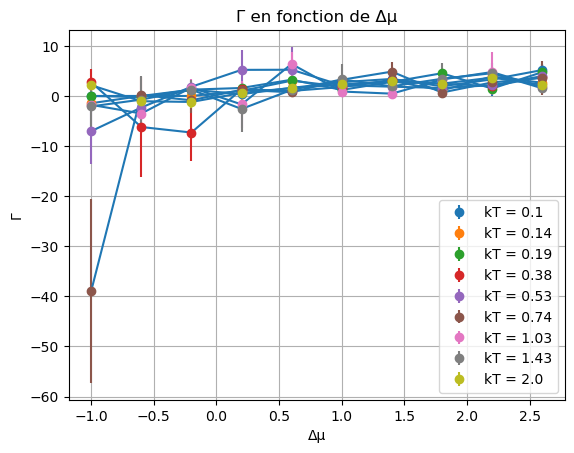

In [6]:
plt.figure()
for index, kT in enumerate(liste_kT[:]):
    if index ==3:
        continue
    plt.errorbar(liste_deltamu, gamma_moy_mu[index], yerr=gamma_std_mu[index], fmt='o', label=f'kT = {round(kT,2)}')
    plt.plot(liste_deltamu, gamma_moy_mu[index], color='#1f77b4')
plt.grid()
plt.xlabel('Δμ')
plt.ylabel('Γ')
plt.title("Γ en fonction de Δμ")
# plt.xlim(-2.8,0.1)
plt.legend()
plt.show()


In [7]:
# liste_deltamu = np.logspace(-1, np.log10(2.5), num=15) - 1.5

# nb_iterations = 5

# liste_gamma_moy_mu=[]
# liste_rugosite_moy_mu=[]
# liste_gamma_std_mu=[]
# liste_rugosite_std_mu=[]

# for param_mu in liste_deltamu:
#     liste_gamma=[]
#     liste_rugosite=[]
#     for b in range(nb_iterations):
#         x = 20
#         y = 50
#         grid = domain.create_grid(x,y)     # [hauteur, largeur]

#         grid_f, deltatemps_reel, parametres = KMC2D(grid, 0.1, param_mu, nb_pas_temps = 30 ,gamma=True, rugosity=True)

#         gamma_iteration=parametres[0][-1]
#         liste_gamma.append(gamma_iteration)

#         rugosite_iteration=parametres[1][-1]
#         liste_rugosite.append(rugosite_iteration)

#     gamma_moy_param=np.mean(liste_gamma)
#     rugosite_moy_param=np.mean(liste_rugosite)

#     gamma_std_param=np.std(liste_gamma)
#     rugosite_std_param=np.std(liste_rugosite)

#     liste_gamma_moy_mu.append(gamma_moy_param)
#     liste_rugosite_moy_mu.append(rugosite_moy_param)

#     liste_gamma_std_mu.append(gamma_std_param)
#     liste_rugosite_std_mu.append(rugosite_std_param)
    

In [8]:
# plt.figure()
# eb = plt.errorbar(liste_deltamu, liste_gamma_moy_mu, yerr=liste_gamma_std_mu, fmt='o', label=f'kT = {round(0.1,2)}')
# color = eb[0].get_color()
# plt.plot(liste_deltamu, liste_gamma_moy_mu, color=color)
# plt.grid()
# plt.xlabel('Δμ')
# plt.ylabel('Γ')
# plt.title("Γ en fonction de Δμ")
# # plt.xlim(-2.8,0.1)
# # plt.ylim(0,12)
# plt.legend()
# plt.show()

